In [36]:
import pandas as pd
df=pd.read_csv("/home/parth/MLOPS/multi-disease-predictor/data/raw/thyroid_cancer_risk_data.csv")
df



,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212686,212687,58,Female,India,Asian,No,No,No,No,Yes,No,2.00,0.64,11.92,1.48,Low,Benign
212687,212688,89,Male,Japan,Middle Eastern,No,No,No,No,Yes,No,9.77,3.25,7.30,4.46,Medium,Benign
212688,212689,72,Female,Nigeria,Hispanic,No,No,No,No,No,Yes,7.72,2.44,8.71,2.36,Medium,Benign
212689,212690,85,Female,Brazil,Middle Eastern,No,No,No,No,No,Yes,5.62,2.53,9.62,1.54,Medium,Benign


In [37]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

df['Gender']=df['Gender'].map({"Male":1,"Female":0})
df['Family_History']=df['Family_History'].map({"Yes":1,"No":0})
df['Radiation_Exposure']=df['Radiation_Exposure'].map({"Yes":1,"No":0})
df['Iodine_Deficiency']=df['Iodine_Deficiency'].map({"Yes":1,"No":0})
df['Smoking']=df['Smoking'].map({"Yes":1,"No":0})
df['Obesity']=df['Obesity'].map({"Yes":1,"No":0})
df['Diabetes']=df['Diabetes'].map({"Yes":1,"No":0})
df['Diagnosis']=df['Diagnosis'].map({"Malignant":1,"Benign":0})


df = pd.get_dummies(df, columns=["Country","Ethnicity", "Thyroid_Cancer_Risk"], drop_first=True).astype(int)
df.to_csv("../data/processed/thyroid_cleaned_data.csv")

df.head()

,Patient_ID,Age,Gender,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,...,Country_Russia,Country_South Korea,Country_UK,Country_USA,Ethnicity_Asian,Ethnicity_Caucasian,Ethnicity_Hispanic,Ethnicity_Middle Eastern,Thyroid_Cancer_Risk_Low,Thyroid_Cancer_Risk_Medium
0,1,66,1,0,1,0,0,0,0,9,...,1,0,0,0,0,1,0,0,1,0
1,2,29,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
2,3,86,1,0,0,0,0,0,0,6,...,0,0,0,0,0,1,0,0,1,0
3,4,75,0,0,0,0,0,0,0,4,...,0,0,0,0,1,0,0,0,0,1
4,5,35,0,1,1,0,0,0,0,9,...,0,0,0,0,0,0,0,0,0,0


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X=df.drop(columns=['Diagnosis'])
Y=df['Diagnosis']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [39]:
# Standardize numerical features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [40]:
# Train Logistic Regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(X_train_scaled, Y_train)

LogisticRegression(random_state=42)

In [41]:
y_pred = lr.predict(X_test_scaled)

In [42]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
acc = accuracy_score(Y_test,y_pred)
print(f"Accuracy: {acc*100} %")


Accuracy: 82.50546557276851 %


In [43]:
# Display classification report
print("\nClassification Report:")
print(classification_report(Y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     32615
           1       0.69      0.45      0.54      9924

    accuracy                           0.83     42539
   macro avg       0.77      0.69      0.72     42539
weighted avg       0.81      0.83      0.81     42539



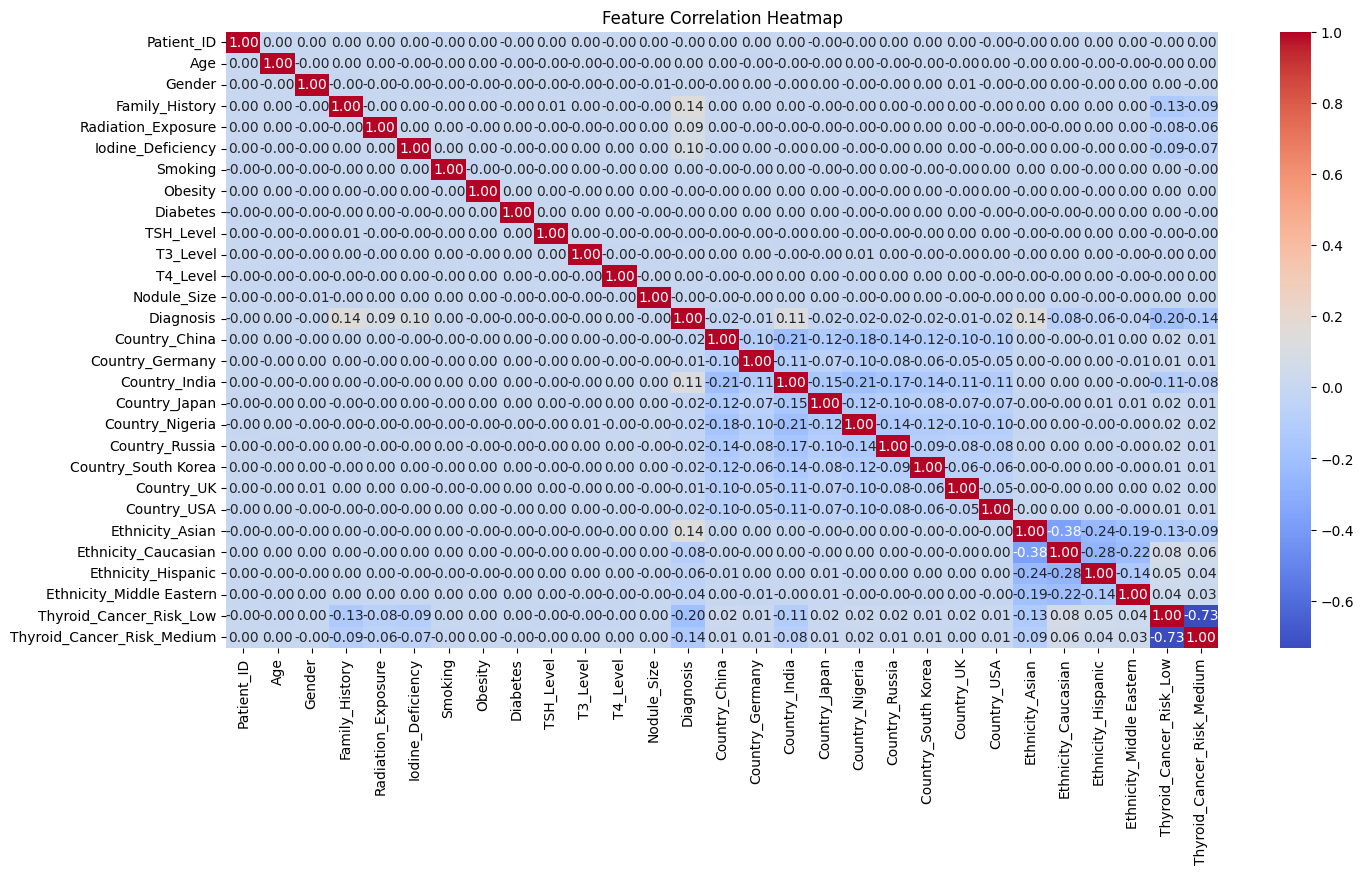

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
correlation_matrix = df.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()